<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-4_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,99.803854,24.773794,45.077189,0.001083,179.655920,179.655263,0.000657
1,0.0,1.0,65.419305,37.273993,83.939303,-0.000855,196.631746,196.632802,-0.001057
2,0.0,2.0,28.626748,68.294133,84.469328,0.000169,191.390378,191.390127,0.000251
3,0.0,3.0,93.184489,72.454983,64.214511,-0.000210,239.853774,239.854043,-0.000269
4,0.0,4.0,99.627861,26.669911,39.306974,0.001934,175.606681,175.605170,0.001510
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,35.996357,45.603595,39.474260,0.000651,131.074862,131.074069,0.000793
29996,999.0,26.0,35.761842,24.804443,49.055056,-0.001110,119.620231,119.621161,-0.000930
29997,999.0,27.0,50.979088,20.504006,45.161073,-0.001790,126.642376,126.644004,-0.001628
29998,999.0,28.0,63.174274,87.512494,97.451388,-0.000186,258.137971,258.138329,-0.000359


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    99.803854  24.773794  45.077189  0.001083  179.655920   
      1.0    65.419305  37.273993  83.939303 -0.000855  196.631746   
      2.0    28.626748  68.294133  84.469328  0.000169  191.390378   
      3.0    93.184489  72.454983  64.214511 -0.000210  239.853774   
      4.0    99.627861  26.669911  39.306974  0.001934  175.606681   
...                ...        ...        ...       ...         ...   
999.0 25.0   35.996357  45.603595  39.474260  0.000651  131.074862   
      26.0   35.761842  24.804443  49.055056 -0.001110  119.620231   
      27.0   50.979088  20.504006  45.161073 -0.001790  126.642376   
      28.0   63.174274  87.512494  97.451388 -0.000186  258.137971   
      29.0   20.569509  21.766206  75.971441 -0.000547  128.306609   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    179.655263  0.000657  
      1.0    196.632802 -0.001057  
      2.0    191.390127  0.000251  
      3.0    239.854043 -0.000269  
      4.0    175.605170  0.001510  
...                 ...       ...  
999.0 25.0   131.074069  0.000793  
      26.0   119.621161 -0.000930  
      27.0   126.644004 -0.001628  
      28.0   258.138329 -0.000359  
      29.0   128.306988 -0.000379  

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    99.803854  24.773794  45.077189  0.001083  179.655920   
      1.0    65.419305  37.273993  83.939303 -0.000855  196.631746   
      2.0    28.626748  68.294133  84.469328  0.000169  191.390378   
      3.0    93.184489  72.454983  64.214511 -0.000210  239.853774   
      4.0    99.627861  26.669911  39.306974  0.001934  175.606681   
...                ...        ...        ...       ...         ...   
999.0 25.0   35.996357  45.603595  39.474260  0.000651  131.074862   
      26.0   35.761842  24.804443  49.055056 -0.001110  119.620231   
      27.0   50.979088  20.504006  45.161073 -0.001790  126.642376   
      28.0   63.174274  87.512494  97.451388 -0.000186  258.137971   
      29.0   20.569509  21.766206  75.971441 -0.000547  128.306609   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    179.655263  0.000657  
      1.0    196.632802 -0.001057  
      2.0    191.390127  0.000251  
      3.0    239.854043 -0.000269  
      4.0    175.605170  0.001510  
...                 ...       ...  
999.0 25.0   131.074069  0.000793  
      26.0   119.621161 -0.000930  
      27.0   126.644004 -0.001628  
      28.0   258.138329 -0.000359  
      29.0   128.306988 -0.000379  

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,99.803854,24.773794,45.077189,0.001083,179.655920,179.655263,0.000657
1,0.0,1.0,65.419305,37.273993,83.939303,-0.000855,196.631746,196.632802,-0.001057
2,0.0,2.0,28.626748,68.294133,84.469328,0.000169,191.390378,191.390127,0.000251
3,0.0,3.0,93.184489,72.454983,64.214511,-0.000210,239.853774,239.854043,-0.000269
4,0.0,4.0,99.627861,26.669911,39.306974,0.001934,175.606681,175.605170,0.001510
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,35.996357,45.603595,39.474260,0.000651,131.074862,131.074069,0.000793
29996,999.0,26.0,35.761842,24.804443,49.055056,-0.001110,119.620231,119.621161,-0.000930
29997,999.0,27.0,50.979088,20.504006,45.161073,-0.001790,126.642376,126.644004,-0.001628
29998,999.0,28.0,63.174274,87.512494,97.451388,-0.000186,258.137971,258.138329,-0.000359


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    99.803854  24.773794  45.077189  0.001083  179.655920   
      1.0    65.419305  37.273993  83.939303 -0.000855  196.631746   
      2.0    28.626748  68.294133  84.469328  0.000169  191.390378   
      3.0    93.184489  72.454983  64.214511 -0.000210  239.853774   
      4.0    99.627861  26.669911  39.306974  0.001934  175.606681   
...                ...        ...        ...       ...         ...   
999.0 25.0   35.996357  45.603595  39.474260  0.000651  131.074862   
      26.0   35.761842  24.804443  49.055056 -0.001110  119.620231   
      27.0   50.979088  20.504006  45.161073 -0.001790  126.642376   
      28.0   63.174274  87.512494  97.451388 -0.000186  258.137971   
      29.0   20.569509  21.766206  75.971441 -0.000547  128.306609   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    179.655263  0.000657  
      1.0    196.632802 -0.001057  
      2.0    191.390127  0.000251  
      3.0    239.854043 -0.000269  
      4.0    175.605170  0.001510  
...                 ...       ...  
999.0 25.0   131.074069  0.000793  
      26.0   119.621161 -0.000930  
      27.0   126.644004 -0.001628  
      28.0   258.138329 -0.000359  
      29.0   128.306988 -0.000379  

[30000 rows x 7 columns]

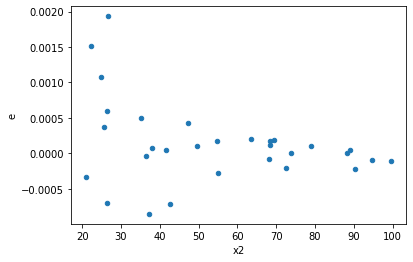

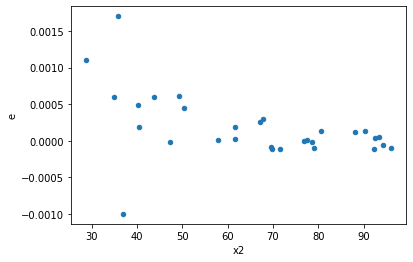

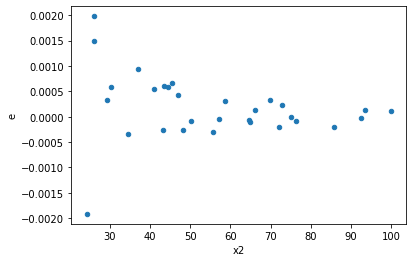

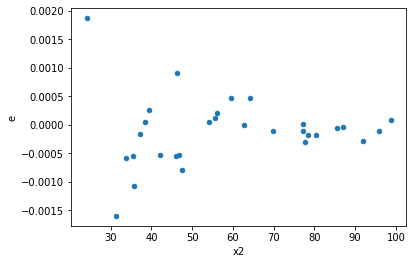

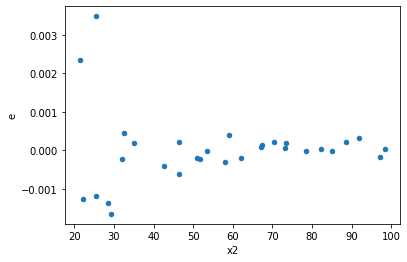

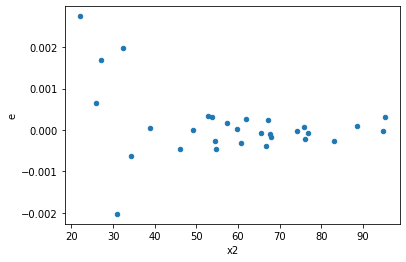

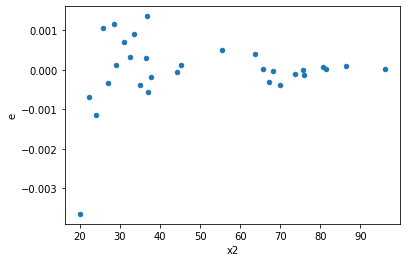

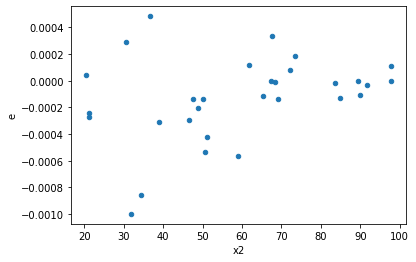

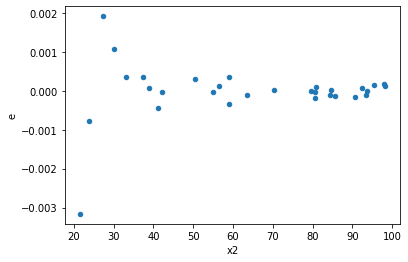

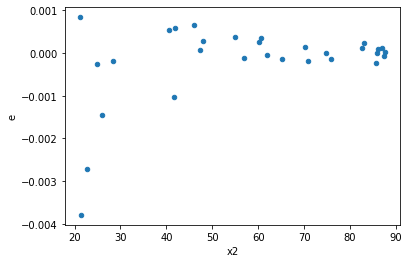

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,15.0,9.0,9.607003732327472e-07,6.181599040452281e-06,6.404669154884982e-08,6.868443378280312e-07,10.724118939136146,0.001109946785595728,0.9994450266072021,0.000554973392797864,Reject001=0 : Heteroscedasticity
1.0,11.0,13.0,2.5992783790728564e-07,3.7443440972101206e-06,2.3629803446116878e-08,2.880264690161631e-07,12.189118274849422,8.079874083621874e-05,0.9999596006295819,4.039937041810937e-05,Reject001=0 : Heteroscedasticity
2.0,11.0,13.0,2.3100759107709145e-06,8.341134220222984e-06,2.1000690097917405e-07,6.416257092479219e-07,3.0552601188641444,0.05923784791879938,0.9703810760406003,0.02961892395939969,Reject001=1 : Homoscedasticity
5.0,5.0,19.0,2.306956628434463e-07,1.5858491719590504e-05,4.613913256868926e-08,8.34657458925816e-07,18.09001193690034,2.446610567696794e-06,0.9999987766947162,1.223305283848397e-06,Reject001=0 : Heteroscedasticity
6.0,11.0,13.0,3.4417358582686876e-06,1.2214727041082657e-05,3.1288507802442613e-07,9.39594387775589e-07,3.0030015931352194,0.06310435204838338,0.9684478239758083,0.03155217602419169,Reject001=1 : Homoscedasticity
10.0,15.0,9.0,1.5012115165110548e-07,3.890579768422915e-06,1.0008076776740365e-08,4.3228664093587945e-07,43.19377744388922,3.124156879197315e-06,0.9999984379215604,1.5620784395986576e-06,Reject001=0 : Heteroscedasticity
11.0,20.0,4.0,1.3796116820210978e-06,1.0375212277886745e-06,6.89805841010549e-08,2.5938030694716864e-07,3.760192963387824,0.20728268008748718,0.8963586599562564,0.10364134004374359,Reject001=1 : Homoscedasticity
12.0,14.0,10.0,2.2737510056889446e-07,3.8462158229879146e-06,1.624107861206389e-08,3.8462158229879144e-07,23.682022080300385,1.714599476576595e-05,0.9999914270026171,8.572997382882974e-06,Reject001=0 : Heteroscedasticity
13.0,11.0,13.0,8.068915821233832e-07,1.1280855350725846e-05,7.335378019303483e-08,8.677581039019882e-07,11.8297666680358,9.54671361006465e-05,0.9999522664319497,4.773356805032325e-05,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,15.0,9.0,9.607003732327472e-07,6.181599040452281e-06,6.404669154884982e-08,6.868443378280312e-07,10.724118939136146,0.001109946785595728,Reject001=0 : Heteroscedasticity
1.0,11.0,13.0,2.5992783790728564e-07,3.7443440972101206e-06,2.3629803446116878e-08,2.880264690161631e-07,12.189118274849422,8.079874083621874e-05,Reject001=0 : Heteroscedasticity
2.0,11.0,13.0,2.3100759107709145e-06,8.341134220222984e-06,2.1000690097917405e-07,6.416257092479219e-07,3.0552601188641444,0.05923784791879938,Reject001=1 : Homoscedasticity
3.0,21.0,3.0,9.65177815440812e-06,6.156625257975105e-08,4.596084835432438e-07,2.052208419325035e-08,0.04465123018409093,1.9159370175089627e-06,Reject001=0 : Heteroscedasticity
4.0,10.0,14.0,2.2844629958686087e-05,7.830716353859675e-07,2.2844629958686086e-06,5.593368824185482e-08,0.024484392324589817,1.2713815565950366e-06,Reject001=0 : Heteroscedasticity
5.0,5.0,19.0,2.306956628434463e-07,1.5858491719590504e-05,4.613913256868926e-08,8.34657458925816e-07,18.09001193690034,2.446610567696794e-06,Reject001=0 : Heteroscedasticity
6.0,11.0,13.0,3.4417358582686876e-06,1.2214727041082657e-05,3.1288507802442613e-07,9.39594387775589e-07,3.0030015931352194,0.06310435204838338,Reject001=1 : Homoscedasticity
7.0,8.0,16.0,8.097049368777944e-07,9.125369447662502e-07,1.012131171097243e-07,5.7033559047890635e-08,0.5634996794542058,0.4151985367668914,Reject001=1 : Homoscedasticity
8.0,14.0,10.0,9.551185522738238e-06,2.369821905344418e-07,6.822275373384456e-07,2.3698219053444178e-08,0.034736532544402045,2.5804630923713213e-07,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    524
Reject001=1 : Homoscedasticity      476
Name: Result_test, dtype: int64